# Green ETF Analysis

In this project we will be comparing and contrasting the largest green ETFs to each other, as well as to the Vanguard Total Stock Market ETF (VTI). The green ETFs are: 
    
    1) iShares Global Clean Energy ETF (NASDAQ:ICLN)
            - Total assets: $2.477 billion

    2)  First Trust NASDAQ Clean Edge Green Energy Index Fund(NASDAQ:QCLN)
            - Total assets: $837.32 billion
            
    3) Invesco WilderHill Clean Energy ETF (ARCA:PBW)
            - Total assets: $366.32 million
    
    4) ALPS Clean Energy ETF (ARCA:ACES)
            - Total assets: $230.22 million
            
    5) SPDR S&P Kensho Clean Power ETF (ARCA:CNRG)
            - Total assets: $213.84 million



In [2]:
# imports for the analysis

import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [3]:
# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline


In [4]:
# for stock information

import yfinance as yf
from datetime import datetime


In [109]:
# setting a time frame we are interested in looking at

end_time = datetime.now()
start_time = datetime(end_time.year-1, end_time.month, end_time.day)

# the tickers of the ETFs we are interested in 

ticker_list= ['ICLN','QCLN','PBW','ACES','CNRG','VTI']

for ticker in ticker_list:
    globals()[ticker] = yf.download(ticker,start = start_time,end = end_time)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
# an example of one of the ETFs

ICLN.head()

Open       High        Low  Close  Adj Close   Volume
Date                                                                  
2023-08-14  16.809999  16.870001  16.540001  16.85  16.607712  2980900
2023-08-15  16.709999  16.730000  16.350000  16.35  16.114901  3528900
2023-08-16  16.299999  16.389999  16.150000  16.17  15.937489  2586500
2023-08-17  16.219999  16.219999  15.960000  15.97  15.740365  2597700
2023-08-18  15.830000  16.020000  15.790000  15.96  15.730509  3418400

In [10]:
ICLN.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    14.246230   14.382579   14.121429   14.243968   14.126225   
std      0.819744    0.809189    0.810367    0.809183    0.780743   
min     12.860000   12.990000   12.720000   12.860000   12.675084   
25%     13.737500   13.865000   13.637500   13.737500   13.665189   
50%     14.020000   14.175000   13.910000   13.995000   13.923411   
75%     14.750000   14.840000   14.535000   14.672500   14.574715   
max     16.809999   16.870001   16.540001   16.850000   16.607712   

             Volume  
count  2.520000e+02  
mean   3.427481e+06  
std    1.474091e+06  
min    1.230900e+06  
25%    2.419150e+06  
50%    3.102950e+06  
75%    4.235400e+06  
max    1.079570e+07

In [11]:
ICLN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-14 to 2024-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## Adjusted Close Values

<Axes: xlabel='Date'>

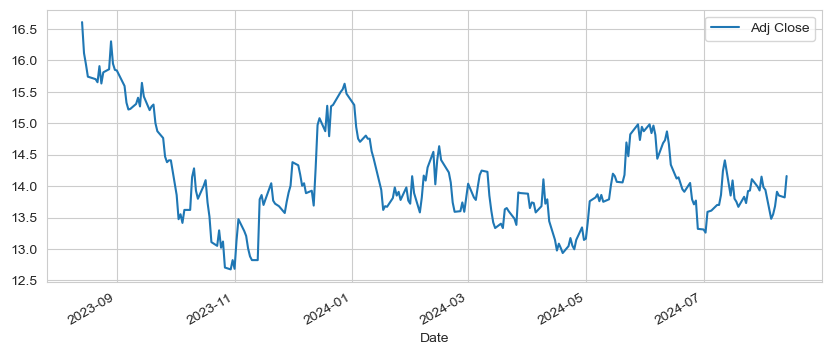

In [12]:
# adjusted close values for one ETF

ICLN['Adj Close'].plot(legend=True, figsize=(10,4))

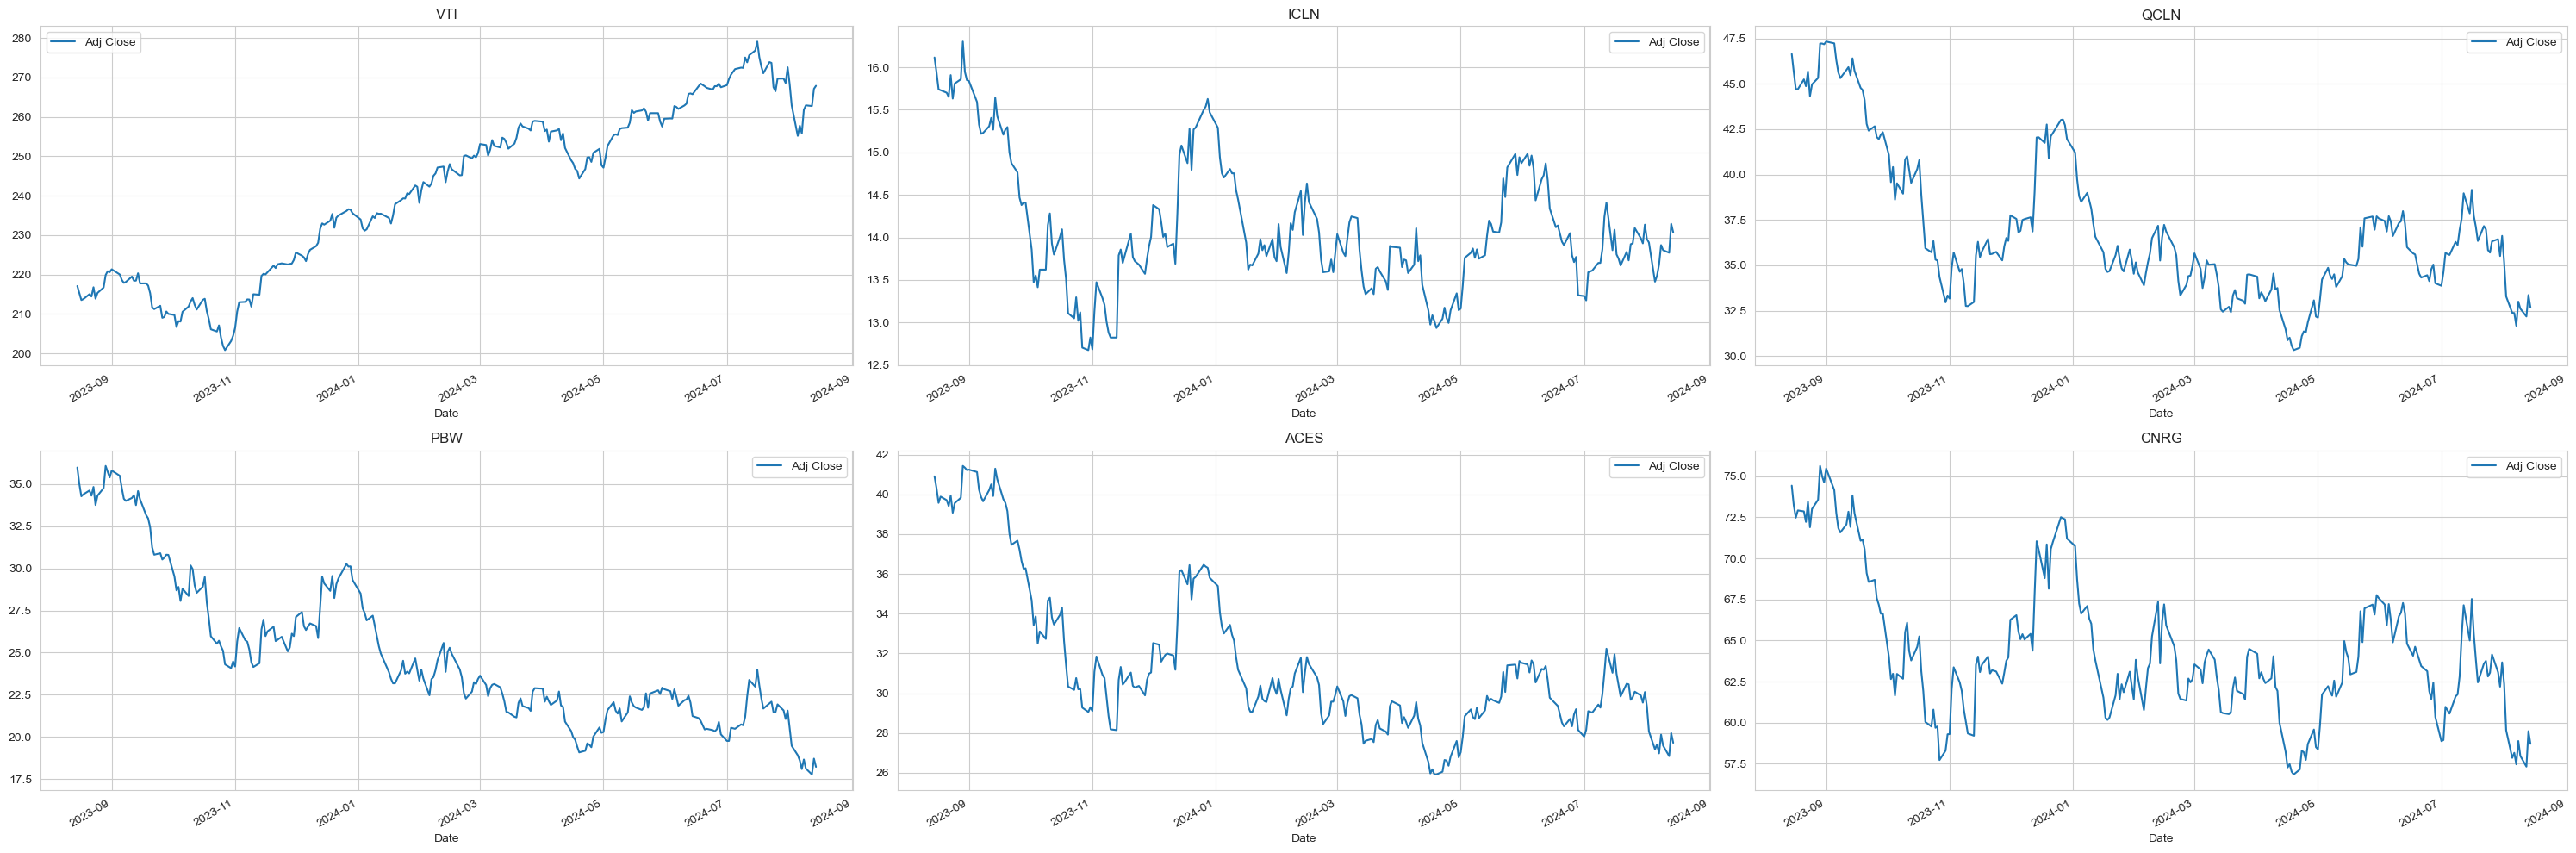

In [7]:
# plotting the values for all ETFs

ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]
tickers = ['VTI','ICLN','QCLN','PBW','ACES','CNRG']

fig, axes = plt.subplots(2, 3, figsize=(30,10))  

for i, ax in enumerate(axes.flatten()):
    ticker_dfs[i]['Adj Close'].plot(legend=True,ax=ax)
    ax.set_title(tickers[i]) 

plt.tight_layout() 
plt.show()

## Moving Averages

In [110]:
# creating the columns

ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]
moving_avg = [10,20,50]

for day in moving_avg:
    
    column_name = 'Moving Avg for %s days' %(str(day))
    
    for ticker in ticker_dfs:
    
        ticker[column_name] = ticker['Adj Close'].rolling(window=day).mean()
    

<Axes: xlabel='Date'>

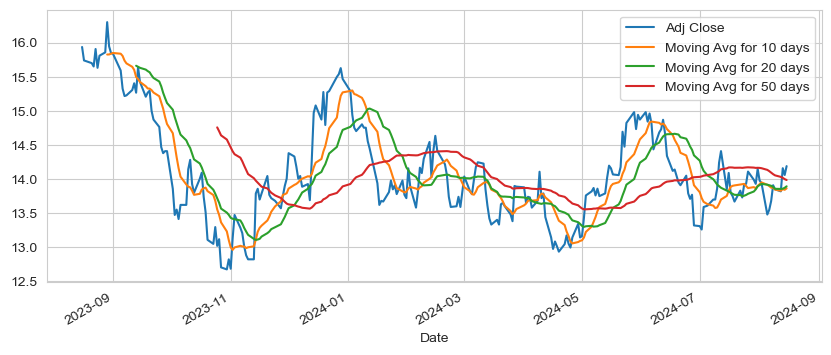

In [111]:
# showing moving averages for one ETF

ICLN[['Adj Close',
     'Moving Avg for 10 days',
     'Moving Avg for 20 days',
     'Moving Avg for 50 days']].plot(subplots=False,figsize=(10,4))

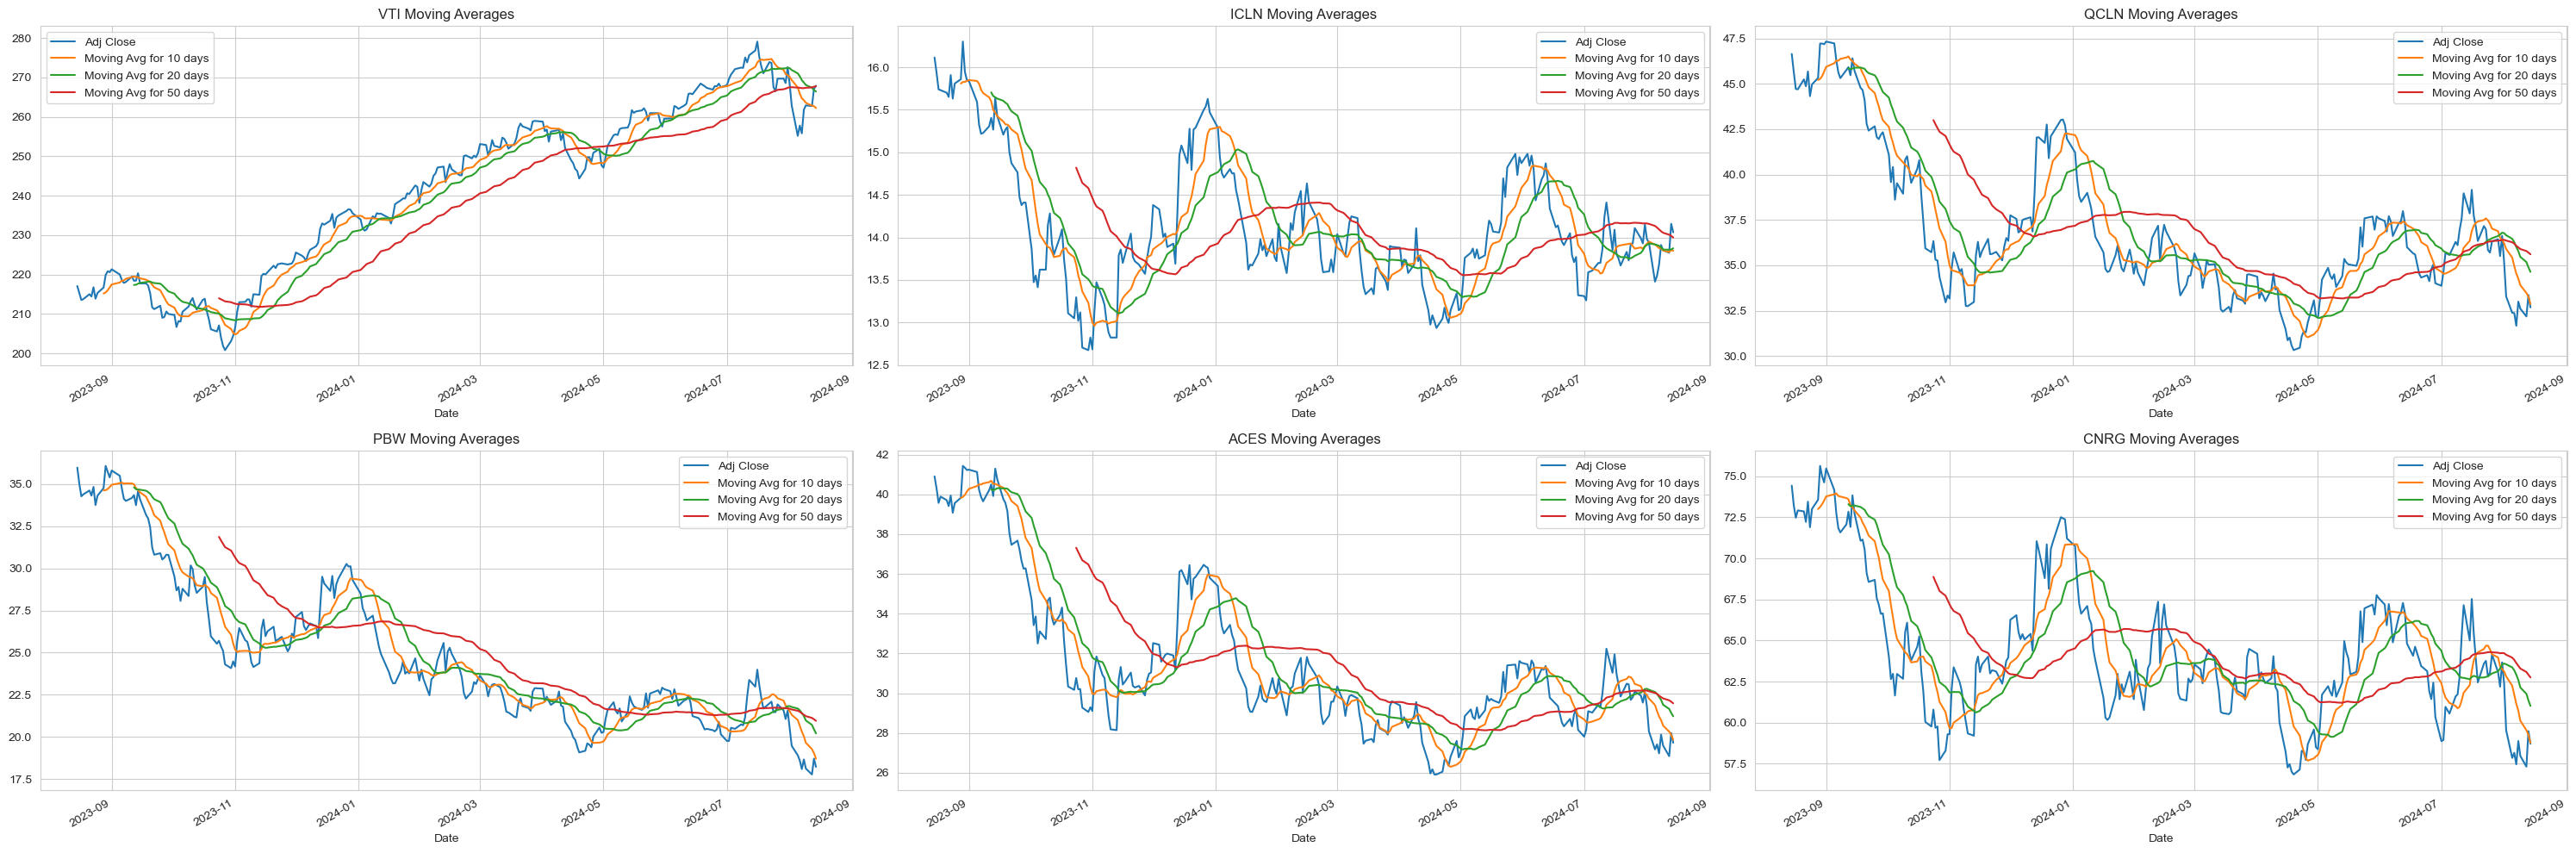

In [10]:
# showing the moving averages for all ETFs

ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]
tickers = ['VTI','ICLN','QCLN','PBW','ACES','CNRG']

fig, axes = plt.subplots(2, 3, figsize=(30,10)) 

for i, ax in enumerate(axes.flatten()):
    ticker_dfs[i][['Adj Close',
               'Moving Avg for 10 days',
               'Moving Avg for 20 days',
               'Moving Avg for 50 days']].plot(ax=ax)
    ax.set_title(tickers[i] + ' Moving Averages') 

plt.tight_layout()  
plt.show()

## Plotting Daily Returns

In [112]:
# creating the daily return column

ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]

for ticker in ticker_dfs:
    ticker['Daily Return'] = ticker['Adj Close'].pct_change()



<Axes: xlabel='Date'>

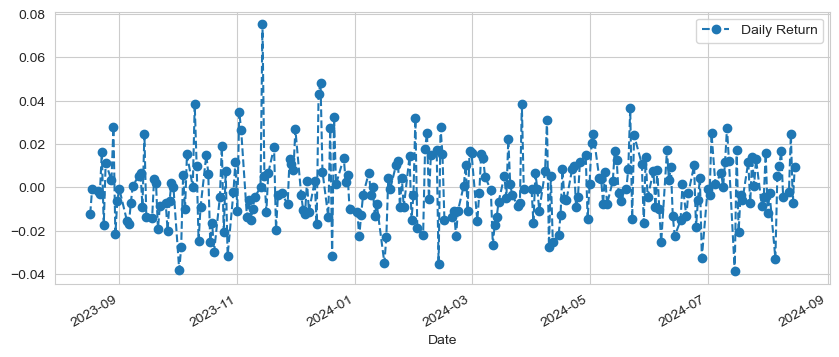

In [113]:
# example daily return

ICLN['Daily Return'].plot(figsize=(10,4),
                         legend=True,
                         linestyle='--',
                         marker='o')


## Daily Returns Using a Combined Histogram and KDE Plot

/Users/julian.olbinski/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


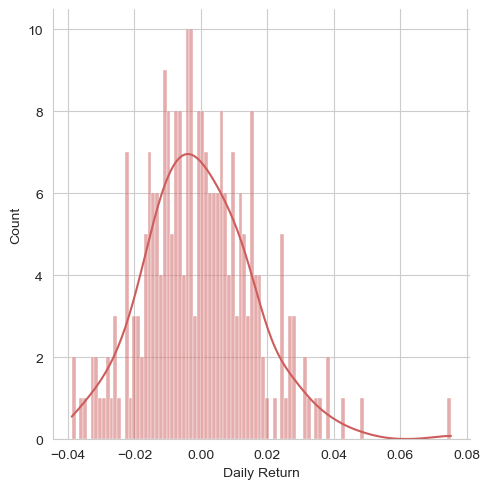

In [51]:
sns.displot(ICLN['Daily Return'].dropna(),bins=100,color='indianred',kde=True)

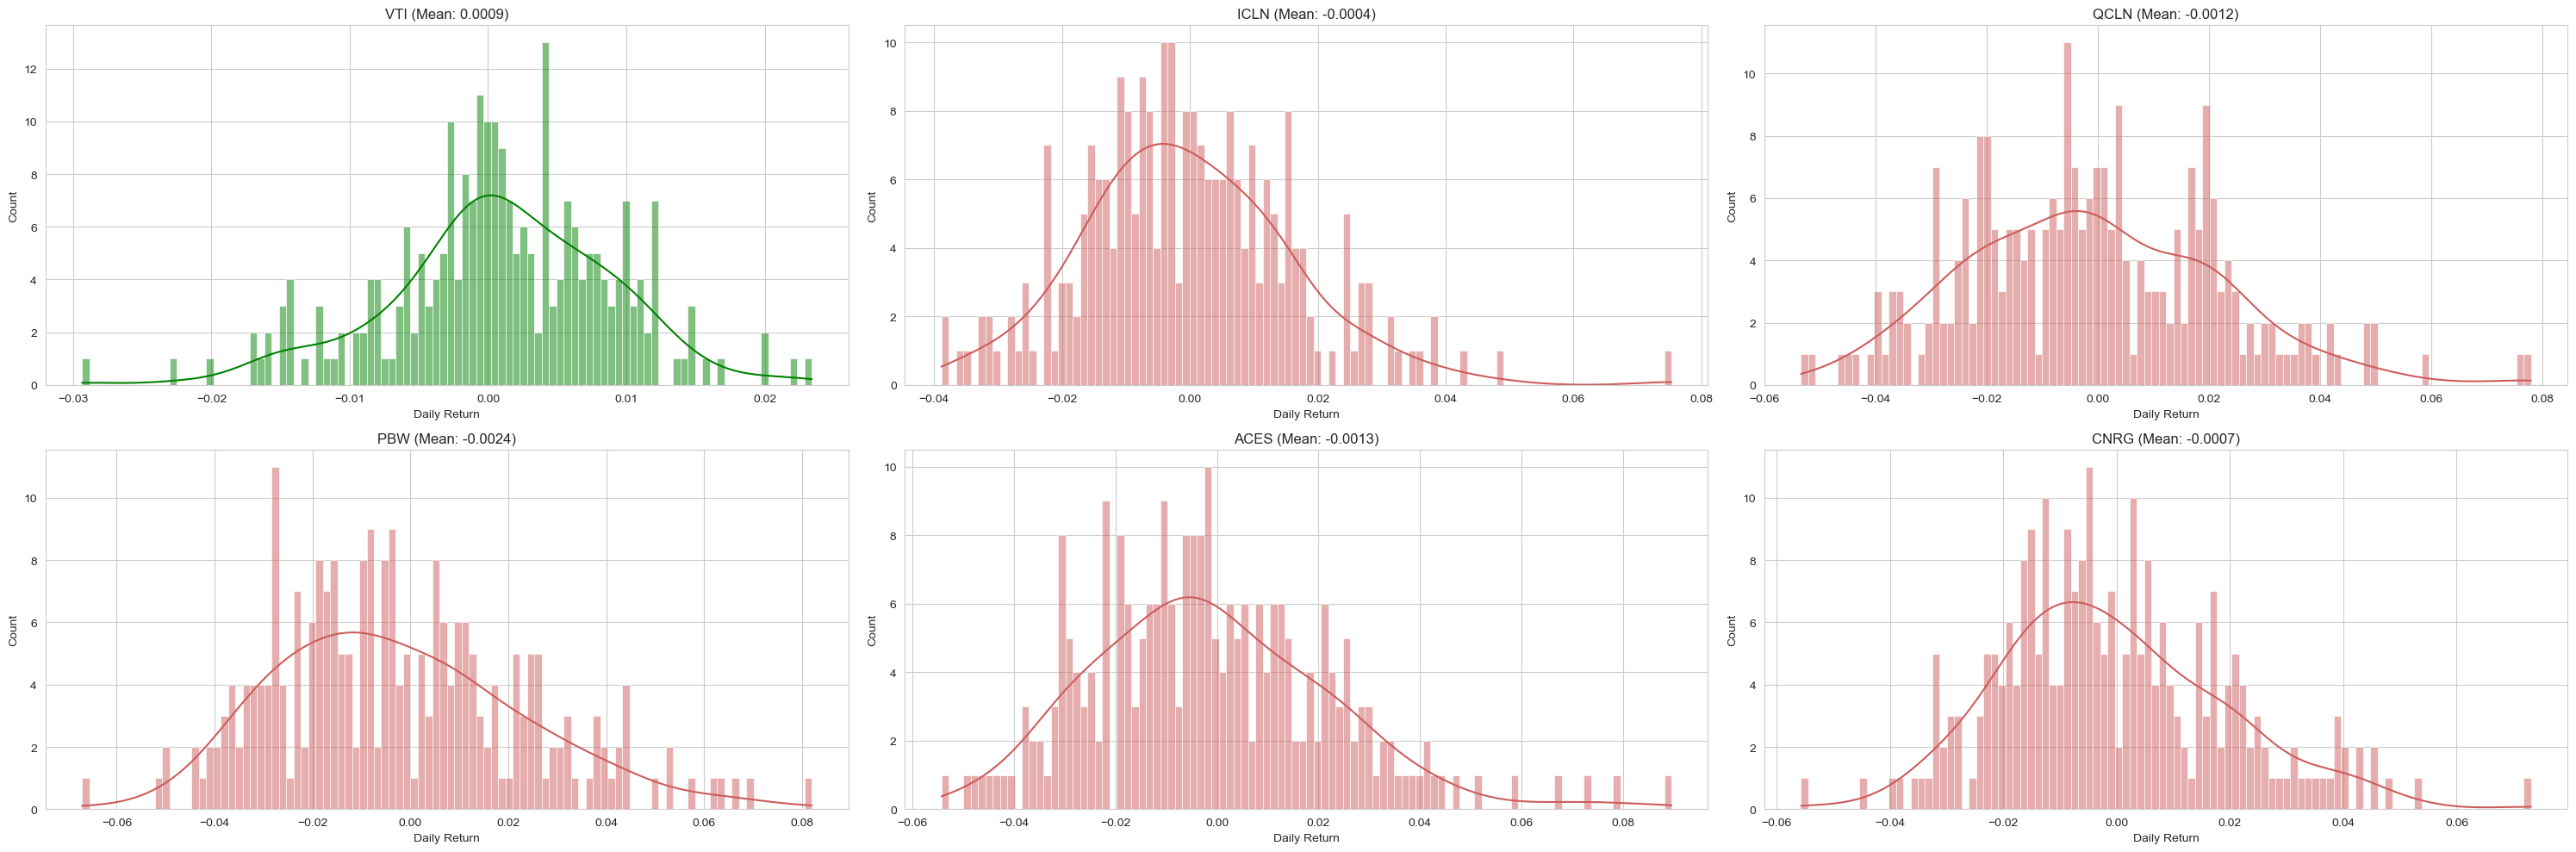

In [12]:
# daily returns of all stocks

ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]
tickers = ['VTI', 'ICLN', 'QCLN', 'PBW', 'ACES', 'CNRG']

fig, axes = plt.subplots(2, 3, figsize=(30, 10))  

for i, ax in enumerate(axes.flatten()):

    mean_return = ticker_dfs[i]['Daily Return'].mean()
    color = 'green' if mean_return > 0 else 'indianred'
    
    sns.histplot(ticker_dfs[i]['Daily Return'].dropna(), 
                 bins=100, 
                 color=color, 
                 kde=True, 
                 ax=ax)
    
    ax.set_title(f"{tickers[i]} (Mean: {mean_return:.4f})") 

plt.tight_layout() 
plt.show()


color coded so that if the mean is > 0, it shows as green, but if it is =<0 it shows as red

## Comparing Adjusted Close Values

In [114]:
# creating a dataframe containing adjusted close values

adj_close_df = yf.download(tickers, 
                           start=start_time,
                           end=end_time)['Adj Close']

adj_close_df.head()

[*********************100%%**********************]  6 of 6 completed


Ticker           ACES       CNRG       ICLN        PBW       QCLN         VTI
Date                                                                         
2023-08-16  40.303226  73.227959  15.937489  35.017532  45.651070  215.298706
2023-08-17  39.571522  72.478920  15.740365  34.276833  44.718201  213.535324
2023-08-18  39.887936  72.922424  15.730509  34.393787  44.698357  213.781586
2023-08-21  39.709953  72.863297  15.700940  34.617947  45.244183  215.013016
2023-08-22  39.413315  72.222672  15.651660  34.315819  44.867065  214.441620

In [116]:
# to calculate the correlation coefficients

from scipy.stats import pearsonr

/Users/julian.olbinski/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


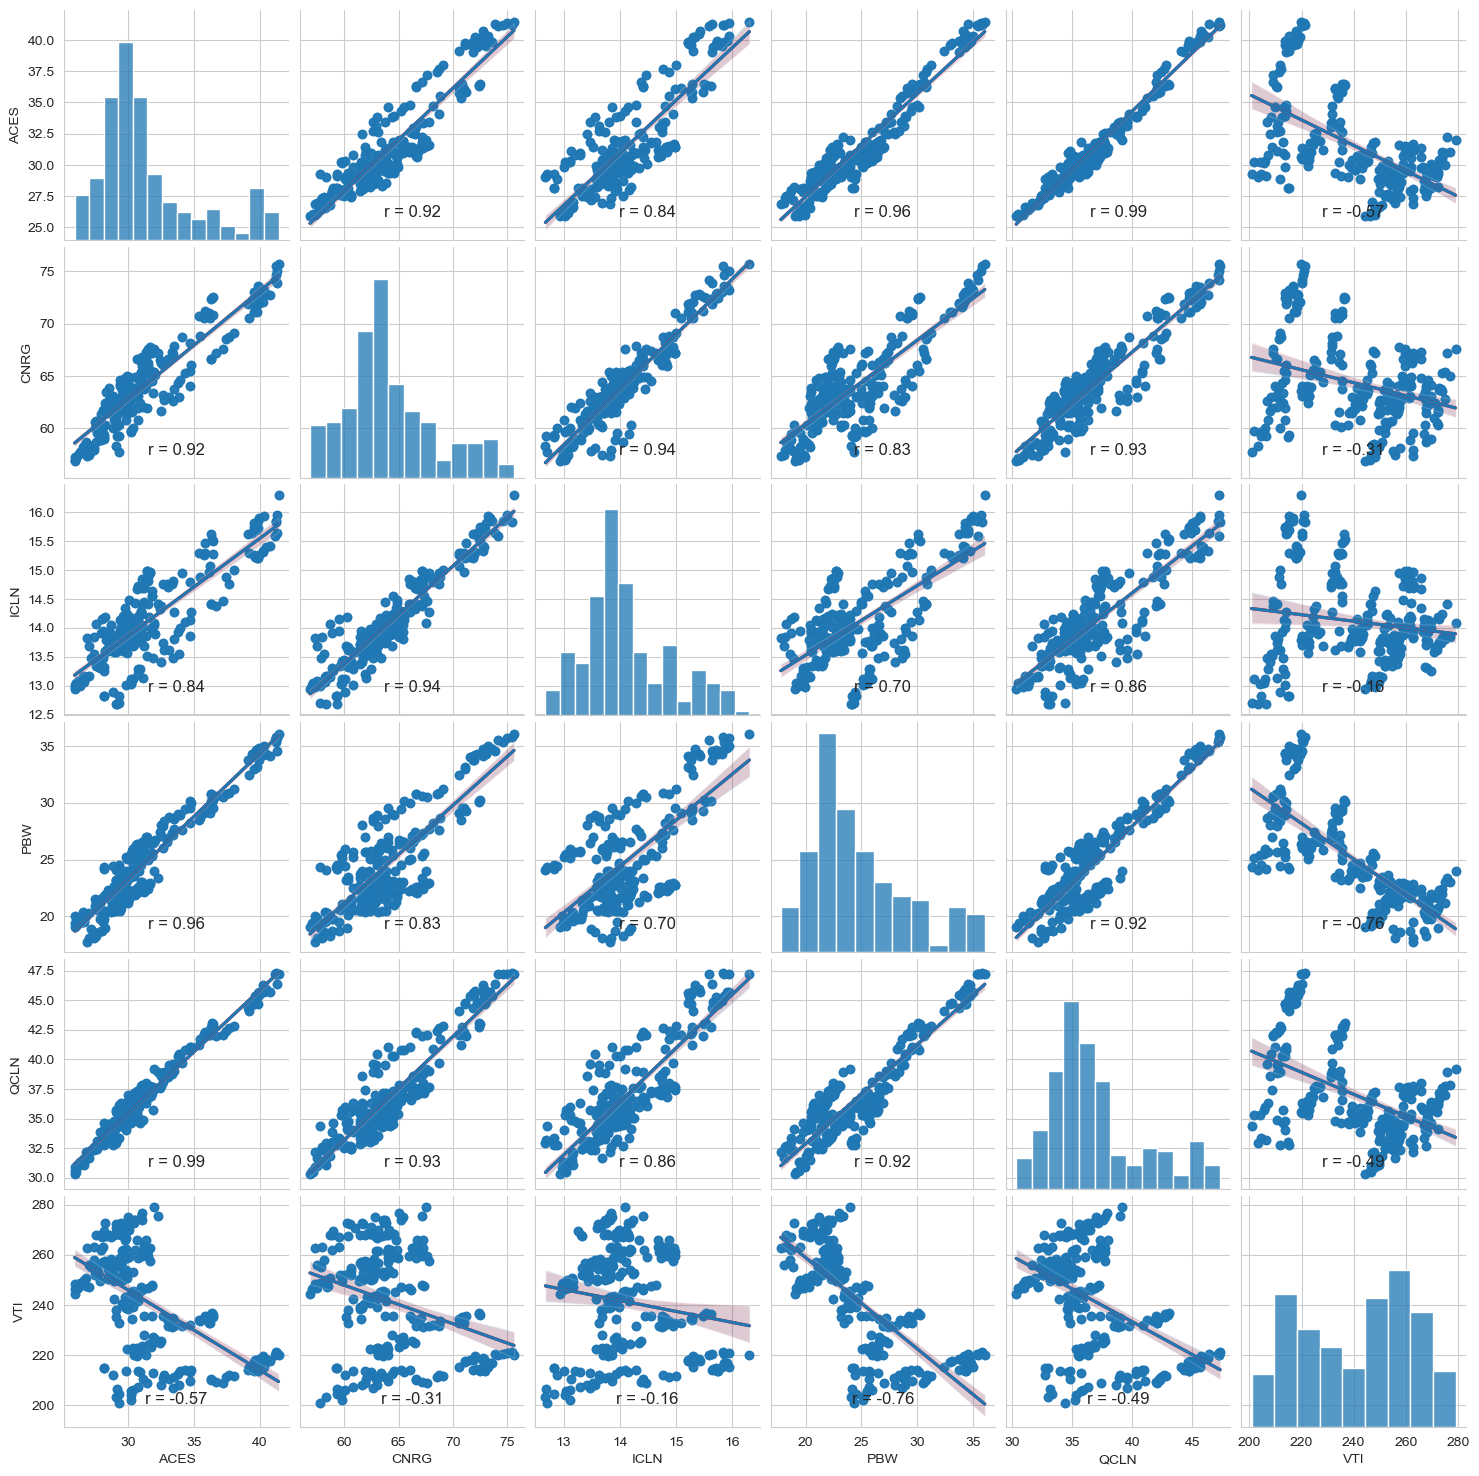

In [119]:
# plotting comparisons of adjusted close values

def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', 
                xy=(0.5, 0.1), 
                xycoords=ax.transAxes, 
                ha='center', 
                fontsize=12)

def regplot_with_corr(x, y, **kws):
    sns.regplot(x=x, y=y, **kws)
    corrfunc(x, y, **kws)

close_fig = sns.pairplot(
             adj_close_df.dropna(), 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})

close_fig.map_upper(regplot_with_corr)
close_fig.map_lower(regplot_with_corr)

plt.show()

As we can see, the adjusted close values for the green ETFs are all strongly correlated with each other - whereas they are all somewhat negatively correlated with the adjusted close values of VTI, the total market ETF.

## Using a Heatmap to Better Visualize the Correlation Values.

<Axes: xlabel='Ticker', ylabel='Ticker'>

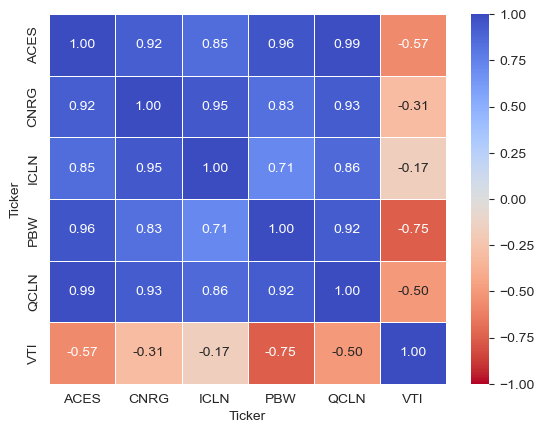

In [30]:
sns.heatmap(adj_close_df.dropna().corr(),annot=True,
           cmap='coolwarm_r',vmin=-1,vmax=1,
           fmt='.2f', linewidths=0.5)

## Pairplot and Heatmap of the Daily Return Values

In [121]:
# creating the dataframe for ETF returns

green_returns = adj_close_df.pct_change()

/Users/julian.olbinski/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


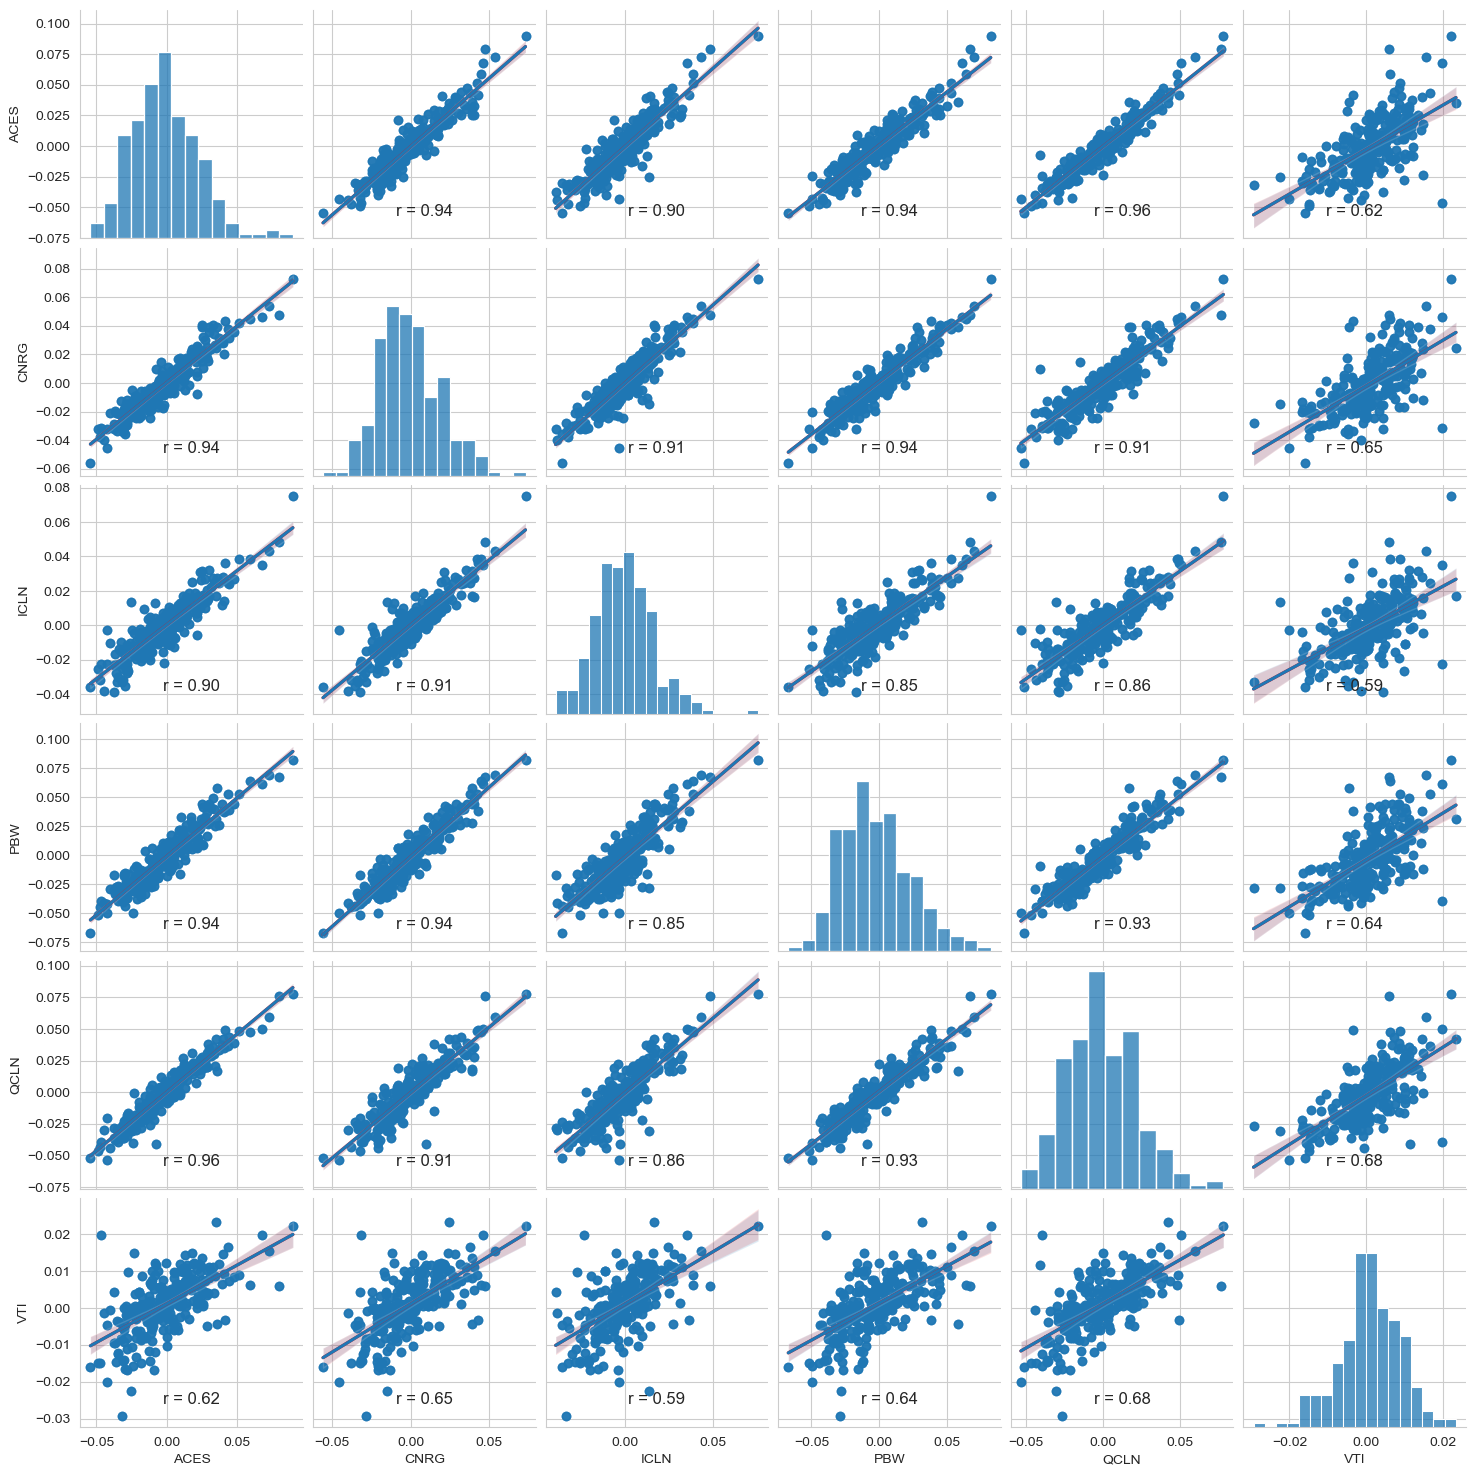

In [31]:
returns_fig = sns.pairplot(
             green_returns.dropna(), 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}}
             )

returns_fig.map_upper(regplot_with_corr)
returns_fig.map_lower(regplot_with_corr)

plt.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

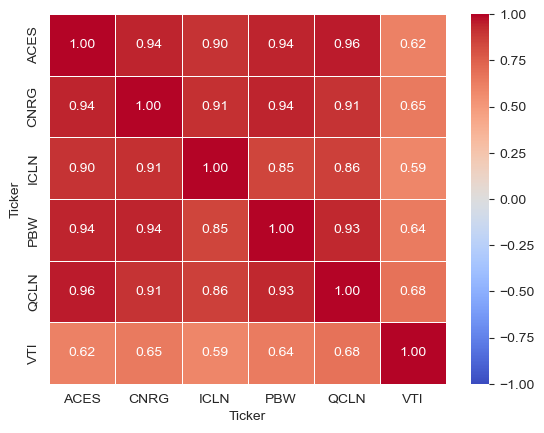

In [32]:
sns.heatmap(green_returns.dropna().corr(), annot=True, 
            cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5)

In the figures above for daily returns, we can see that there were positive correlations among the green ETFs with respect to each other **as well as** with respect to VTI. This interesting result may be related to just how small the values for the daily returns are, therefore not taking into account the net negative returns of the green ETFs and the net positive returns of VTI. 

Therefore, one should consider these results in conjunction with the combined histogram and KDE plots to get a better picture of the data.

## Assessing Value at Risk

### Using Quantiles

In [61]:
# creating a dictionary for values at risk

var_dict = {}

for ticker in tickers:
    gr = (green_returns[ticker].dropna().quantile(0.05) * 100).round(2)
    var_dict[ticker] = gr

sorted_var = sorted(var_dict.items(), 
                    key=lambda item: item[1],
                   reverse=True)

print("Tickers ranked by Value at Risk (desc):")
print('\n')
for ticker, var in sorted_var:
    print(f'{ticker}: {var}%')

Tickers ranked by Value at Risk (desc):


VTI: -1.44%
ICLN: -2.54%
CNRG: -3.07%
ACES: -3.52%
QCLN: -3.64%
PBW: -3.77%


### Using the Monte Carlo Method

In [67]:
# time horizon

days = 365
dt = 1/days


In [69]:
# define the Monte Carlo function

def monte_carlo(start_price,days):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for ticker in tickers:
            
        mu = green_returns.mean()[ticker]
        sigma = green_returns.std()[ticker]
        
        for x in range(1,days):
            
            shock[x] = np.random.normal(loc=mu*dt,
                                        scale=sigma*np.sqrt(dt))
            drift[x] = mu * dt
            price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
            
    return price


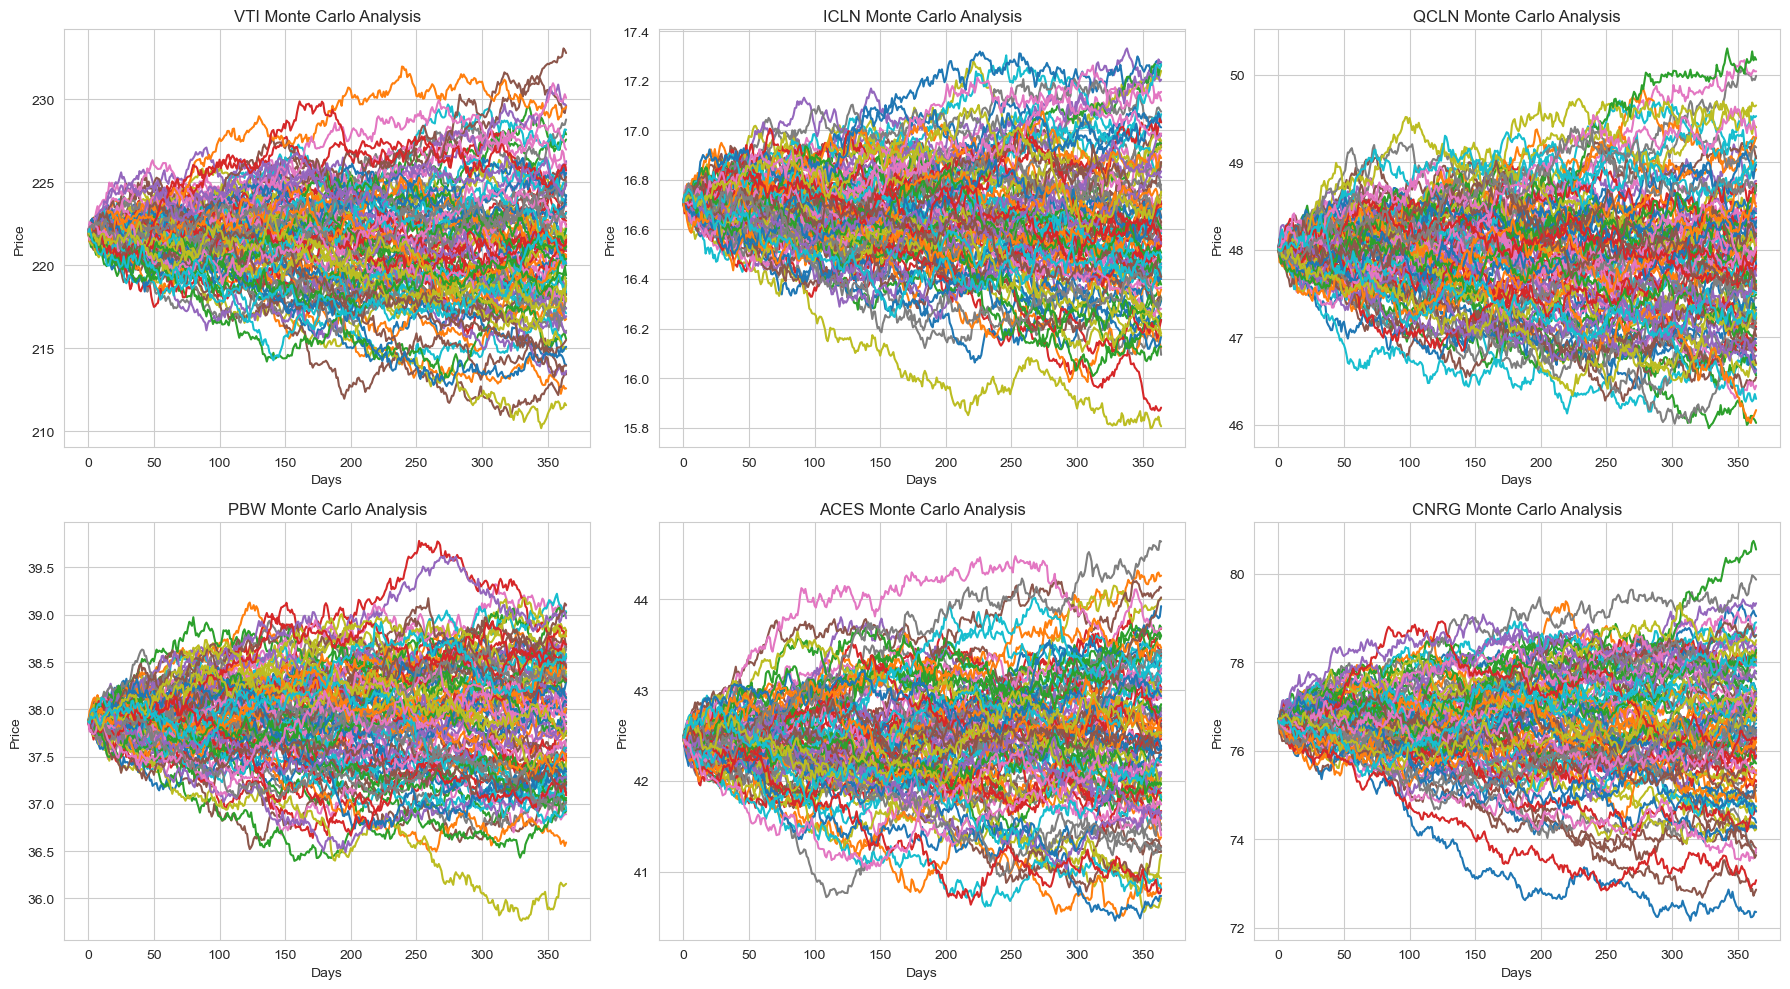

In [103]:
# making the plots

ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]
tickers = ['VTI', 'ICLN', 'QCLN', 'PBW', 'ACES', 'CNRG']

fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 

for i, ax in enumerate(axes.flatten()):
    ticker = ticker_dfs[i]
    ticker_name = tickers[i]
    start_price = ticker['Open'][0]
    
    mu = green_returns.mean()[ticker_name]
    sigma = green_returns.std()[ticker_name]
    
    for run in range(100):
        ax.plot(monte_carlo(start_price, days))
    
    ax.set_title(ticker_name+' Monte Carlo Analysis') 
    ax.set_xlabel("Days")
    ax.set_ylabel("Price")

plt.tight_layout()  
plt.show()


### Estimated Price Distribtions Using the Monte Carlo Method

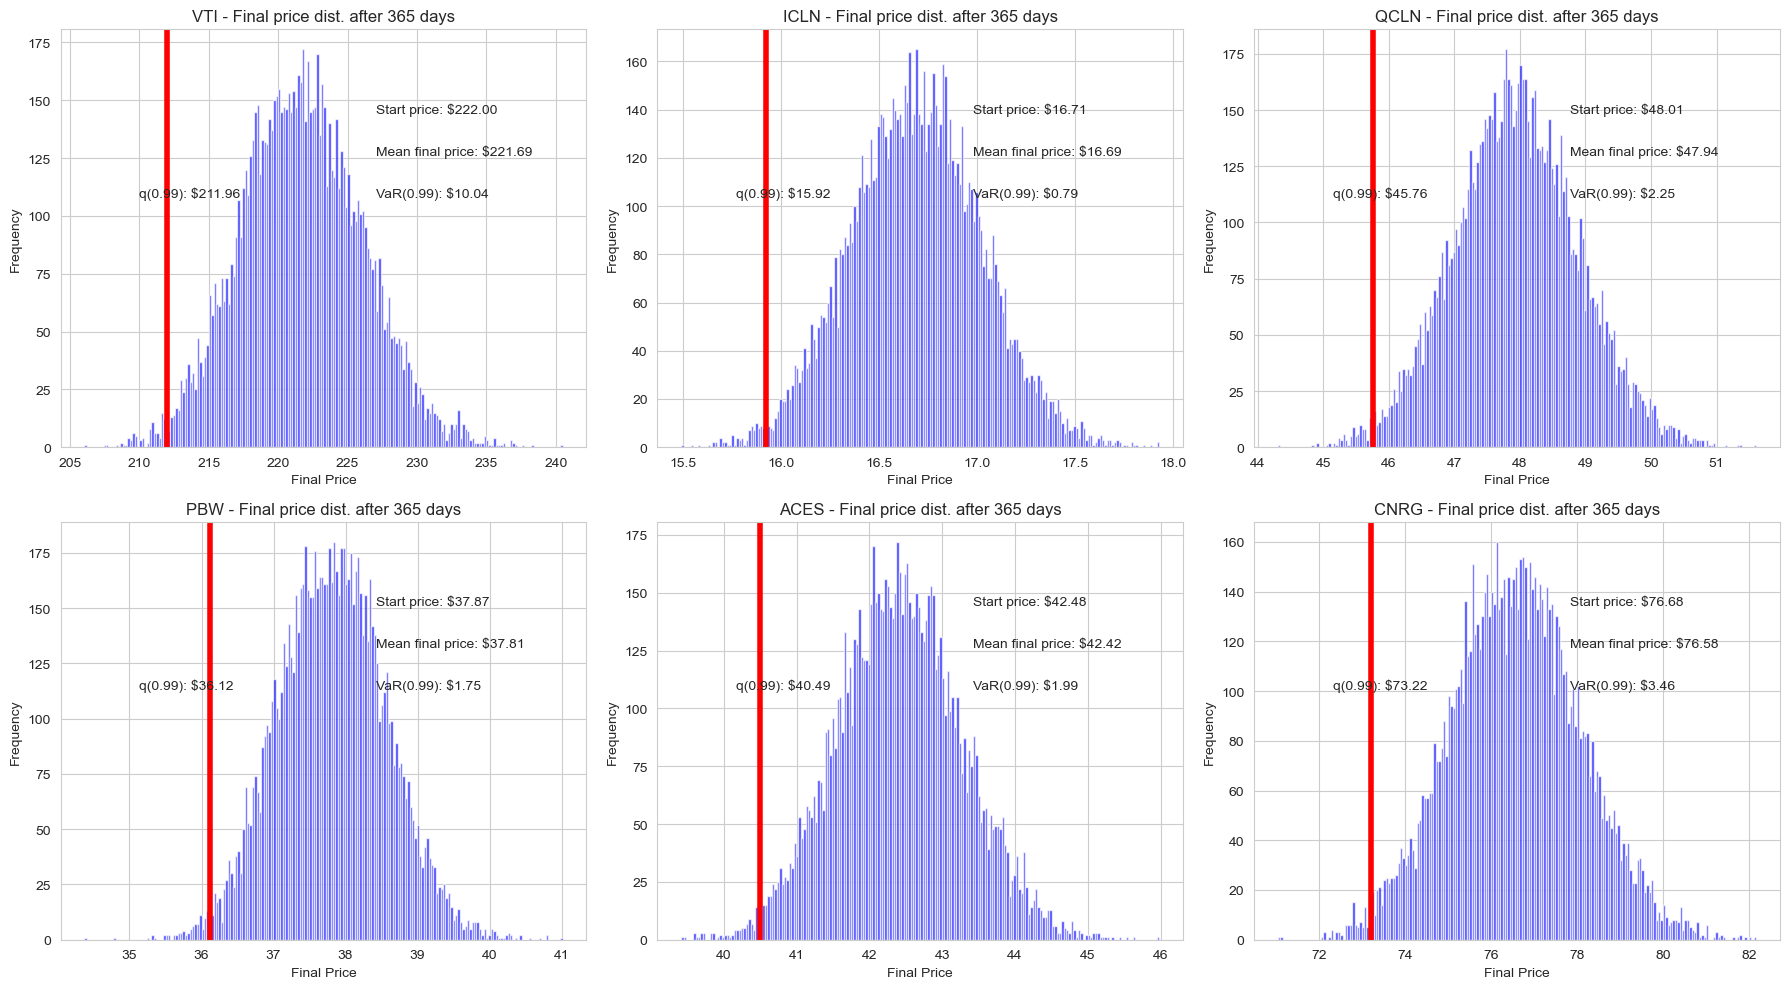

In [108]:
ticker_dfs = [VTI, ICLN, QCLN, PBW, ACES, CNRG]
ticker_names = ['VTI', 'ICLN', 'QCLN', 'PBW', 'ACES', 'CNRG']

runs = 10000

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
axes = axes.flatten() 

for i in range(len(ticker_dfs)):
    ticker_df = ticker_dfs[i]  
    ticker_name = ticker_names[i]  
    start_price = ticker_df['Open'][0]

    mu = green_returns.mean()[ticker_name]
    sigma = green_returns.std()[ticker_name]

    simulations = np.zeros(runs)
    
    for run in range(runs):
        simulations[run] = monte_carlo(start_price, days)[days - 1]

    q = np.percentile(simulations, 1)

    ax = axes[i]
    ax.hist(simulations, bins=200, color='blue', alpha=0.7)

    ax.set_title(f'{ticker_name} - Final price dist. after {days} days')
    ax.axvline(x=q, linewidth=4, color='r')
    ax.set_xlabel('Final Price')
    ax.set_ylabel('Frequency')

    ax.text(0.6, 0.8, f'Start price: ${start_price:.2f}', transform=ax.transAxes)
    ax.text(0.6, 0.7, f'Mean final price: ${simulations.mean():.2f}', transform=ax.transAxes)
    ax.text(0.6, 0.6, f'VaR(0.99): ${start_price - q:.2f}', transform=ax.transAxes)
    ax.text(0.15, 0.6, f'q(0.99): ${q:.2f}', transform=ax.transAxes)

plt.tight_layout()  
plt.show()
